# WAMEX Rockchip Correlations - 1km

In [64]:
def replace_neg9999(val):
    if val == -9999: 
        return 0
    else:
        return val
    
def abs_halve_neg_val(val):
    if val < 0: 
        return abs(val) / 2
    else: 
        return val

def clean_assays_co(df):
    df = df.applymap(replace_neg9999)
    df = df.applymap(abs_halve_neg_val)
    df = df[df['Ni'] < 300000]
    
    return df

def clean_assays_zn(df):
    df = df.applymap(replace_neg9999)
    df = df.applymap(abs_halve_neg_val)
    
    return df

## Cobalt

In [65]:
import pandas as pd

In [66]:
file_path = 'Merged_Ni_lessthan15km.csv'

df = pd.read_csv(file_path, index_col=0)
df.head(3)

,Unnamed: 0_x,Ni,Cu,Co,Pd,Au,Pt,Rh,Fe,S,Ag,lat,long,Unnamed: 0_y,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,33,56.0,420.0,9.0,14.0,0.01,1.0,NaN,NaN,NaN,NaN,-17.234642,128.032146,46661,"(-17.34893, 128.022095)",S0001442,-17.234642,128.032146,12.693593881734987 km
1,33,56.0,420.0,9.0,14.0,0.01,1.0,NaN,NaN,NaN,NaN,-17.234642,128.032146,46662,"(-17.31078, 128.023499)",S0002890,-17.234642,128.032146,8.476376684524638 km
2,33,56.0,420.0,9.0,14.0,0.01,1.0,NaN,NaN,NaN,NaN,-17.234642,128.032146,46663,"(-17.3526, 128.027695)",S0019720,-17.234642,128.032146,13.063277176872425 km


In [67]:
df.shape

(150625, 19)

### filter less or equal to 1km

In [68]:
#need to change distance column to numeric
def dist_to_float(val):
        val = val[0:-3]
        return float(val)

In [69]:
for i in range(0, len(df)):
    df.at[i, 'distance'] = dist_to_float(df.at[i, 'distance'])

In [70]:
df = df[df['distance']<=1]
df.shape

(5835, 19)

In [71]:
df_unique = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'lat', 'long', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

df_unique = df_unique.drop_duplicates()

In [72]:
print(f"Amount of Duplicate rows: {df.shape[0] - df_unique.shape[0]}")

Amount of Duplicate rows: 2884


In [73]:
df_unique.shape

(2951, 12)

In [74]:
df_unique.isna().sum()

Ni              0
Cu             52
Co              0
Pd           1361
Au            946
Pt           1357
Rh           2069
Fe           1194
S            1239
Ag           1473
wamex_lat       0
wamex_lon       0
dtype: int64

In [75]:
#change NAs to 0
df_unique = df_unique.fillna(0)

In [76]:
df_minerals = df_unique.drop(columns=['wamex_lat', 'wamex_lon'])

df_unique.loc[:, df_minerals.columns] = clean_assays_co(df_unique.loc[:,df_minerals.columns])
df_unique.shape

(2951, 12)

In [77]:
df_unique = df_unique.drop_duplicates()
df_unique.shape

(2944, 12)

<AxesSubplot:>

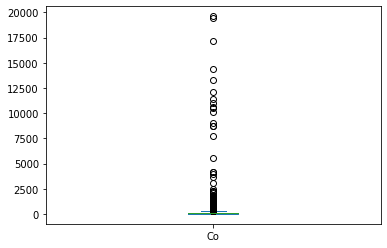

In [29]:
df_unique['Co'].plot(kind='box')

In [31]:
df_unique_corr = df_unique.corr()

In [32]:
df_unique.corr()

,Ni,Cu,Co,Pd,Au,Pt,Rh,Fe,S,Ag,wamex_lat,wamex_lon
Ni,1.000000,0.108374,0.239854,0.105371,-0.059352,0.001500,-0.007069,-0.091675,0.002184,-0.015792,0.063577,0.261229
Cu,0.108374,1.000000,0.010296,0.107283,-0.015070,0.011517,0.007172,-0.022500,-0.007922,-0.004776,0.195462,0.144866
Co,0.239854,0.010296,1.000000,0.000737,-0.027865,0.031308,-0.005728,-0.015180,-0.005741,0.035981,-0.070024,0.091441
Pd,0.105371,0.107283,0.000737,1.000000,-0.030816,0.129249,0.124961,-0.004897,-0.013294,-0.007691,0.002496,0.057883
Au,-0.059352,-0.015070,-0.027865,-0.030816,1.000000,-0.011699,-0.006480,-0.042059,-0.012326,-0.003820,-0.118949,0.026586
Pt,0.001500,0.011517,0.031308,0.129249,-0.011699,1.000000,0.021461,0.046541,-0.004413,0.288957,0.049994,-0.044069
Rh,-0.007069,0.007172,-0.005728,0.124961,-0.006480,0.021461,1.000000,0.014334,-0.002613,-0.001670,0.006534,-0.005837
Fe,-0.091675,-0.022500,-0.015180,-0.004897,-0.042059,0.046541,0.014334,1.000000,0.027201,0.122790,-0.023538,0.019185
S,0.002184,-0.007922,-0.005741,-0.013294,-0.012326,-0.004413,-0.002613,0.027201,1.000000,-0.003805,0.012901,-0.010057
Ag,-0.015792,-0.004776,0.035981,-0.007691,-0.003820,0.288957,-0.001670,0.122790,-0.003805,1.000000,-0.044333,0.060725


In [33]:
df_unique_corr['dataframe'] = 'WAMEX Rockchip'

In [34]:
df_unique_corr.to_csv('Co_correlations_Rockchip_1km.csv')

## Indium/Germanium

In [38]:
file_path = 'Merged_lessthan15km_In_Ge.csv'

df = pd.read_csv(file_path, index_col=0)
df.head(3)

,Unnamed: 0_x,Zn,Ag,Cu,Pb,Au,Co,In,Ge,lat,long,Unnamed: 0_y,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,24985,14.0,0.03,11.6,1.2,NaN,1.6,0.007,0.025,-23.722310,119.290297,2271,"(-23.715655, 119.281652)",S0002505,-23.722310,119.290297,1.1490822602067268 km
1,24986,18.0,0.05,55.7,1.4,NaN,4.4,0.053,0.110,-23.722511,119.290732,3573,"(-23.715655, 119.281652)",S0002505,-23.722511,119.290732,1.1974451584269783 km
2,24987,72.0,0.10,54.2,21.8,NaN,14.9,0.076,0.070,-23.720042,119.286168,3473,"(-23.715655, 119.281652)",S0002505,-23.720042,119.286168,0.6694362586362227 km


In [42]:
df.shape

(4909, 17)

In [40]:
df['distance'].describe()

count                      4909
unique                     3361
top       11.418691703026479 km
freq                         12
Name: distance, dtype: object

In [41]:
for i in range(0, len(df)):
    df.at[i, 'distance'] = dist_to_float(df.at[i, 'distance'])

In [43]:
df = df[df['distance']<=1]
df.shape

(286, 17)

In [44]:
df_unique = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'lat', 'long', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

df_unique = df_unique.drop_duplicates()

In [45]:
print(f"Amount of Duplicate rows: {df.shape[0] - df_unique.shape[0]}")

Amount of Duplicate rows: 72


In [46]:
df_unique.shape

(214, 10)

In [47]:
df_unique.isna().sum()

Zn            0
Ag            0
Cu           10
Pb            0
Au           23
Co            0
In            0
Ge            0
wamex_lat     0
wamex_lon     0
dtype: int64

In [48]:
#change NAs to 0
df_unique = df_unique.fillna(0)

In [49]:
df_minerals = df_unique.drop(columns=['wamex_lat', 'wamex_lon'])

df_unique.loc[:, df_minerals.columns] = clean_assays_zn(df_unique.loc[:,df_minerals.columns])
df_unique.shape

(214, 10)

In [50]:
df_unique = df_unique.drop_duplicates()
df_unique.shape

(214, 10)

<AxesSubplot:>

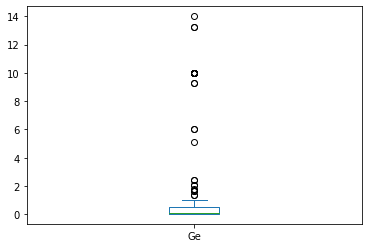

In [51]:
df_unique['Ge'].plot(kind='box')

<AxesSubplot:>

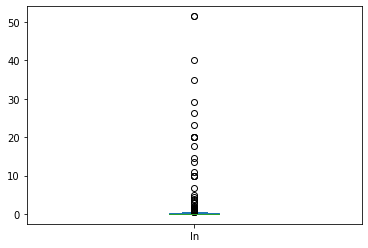

In [54]:
df_unique['In'].plot(kind='box')

In [55]:
only_ge = df_unique.corr()['Ge'].sort_values()
only_in = df_unique.corr()['In'].sort_values()

In [56]:
only_ge[0:5]

wamex_lon   -0.293608
Pb           0.142517
wamex_lat    0.256096
Zn           0.355080
Ag           0.400856
Name: Ge, dtype: float64

In [57]:
only_ge[-20:]

wamex_lon   -0.293608
Pb           0.142517
wamex_lat    0.256096
Zn           0.355080
Ag           0.400856
Au           0.407188
Co           0.454929
Cu           0.545180
In           0.647412
Ge           1.000000
Name: Ge, dtype: float64

In [58]:
only_in[0:5]

wamex_lat   -0.130168
wamex_lon   -0.027026
Pb           0.274988
Au           0.384623
Ag           0.388069
Name: In, dtype: float64

In [59]:
only_in[-20:]

wamex_lat   -0.130168
wamex_lon   -0.027026
Pb           0.274988
Au           0.384623
Ag           0.388069
Co           0.400482
Cu           0.406482
Zn           0.458381
Ge           0.647412
In           1.000000
Name: In, dtype: float64

In [60]:
Zn_deposits = ['Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'In', 'Ge', 'wamex_lat', 'wamex_lon']
only_minedex = df_unique[Zn_deposits].corr()

In [61]:
only_minedex

,Zn,Ag,Cu,Pb,Au,Co,In,Ge,wamex_lat,wamex_lon
Zn,1.000000,0.107959,0.140253,0.545672,0.096263,0.056042,0.458381,0.355080,-0.300482,-0.124224
Ag,0.107959,1.000000,0.128012,0.030692,0.320534,0.173490,0.388069,0.400856,-0.025145,0.050647
Cu,0.140253,0.128012,1.000000,0.115430,0.479543,0.664866,0.406482,0.545180,0.189028,-0.209431
Pb,0.545672,0.030692,0.115430,1.000000,-0.023386,0.013395,0.274988,0.142517,-0.164587,-0.332053
Au,0.096263,0.320534,0.479543,-0.023386,1.000000,0.548256,0.384623,0.407188,-0.174767,0.217672
Co,0.056042,0.173490,0.664866,0.013395,0.548256,1.000000,0.400482,0.454929,0.215098,-0.176932
In,0.458381,0.388069,0.406482,0.274988,0.384623,0.400482,1.000000,0.647412,-0.130168,-0.027026
Ge,0.355080,0.400856,0.545180,0.142517,0.407188,0.454929,0.647412,1.000000,0.256096,-0.293608
wamex_lat,-0.300482,-0.025145,0.189028,-0.164587,-0.174767,0.215098,-0.130168,0.256096,1.000000,-0.671257
wamex_lon,-0.124224,0.050647,-0.209431,-0.332053,0.217672,-0.176932,-0.027026,-0.293608,-0.671257,1.000000


In [63]:
only_minedex.to_csv('GeIn_correlations_Rockchip_within1km.csv')